# Lab 10/Mini-Project 2: Exploring magnetic ordering using neutron diffraction

*Antiferromagnetism* is the phenomenon where alternate magnetic moments in a solid point in opposite directions. As a result, the solid has no magnetic moment, making this behaviour a little tricky to observe directly. (This contrasts with *ferromagnetism*, the familiar phenomenon in iron where each magnetic moment has the same direction, and therefore the solid as a whole acts as a magnet.) However, antiferromagnetism increases (often, doubles) the crystallographic unit cell size for radiation beams sensitive to magnetism, such as neutrons. As a result, characteristic peaks are produced in a neutron diffraction pattern.

This ordering typically only happens at very low temperatures, where thermal energy does not disrupt the order. Important parameters that characterise this behaviour include the *transition temperature* below which the magnetic moments order and the *critical exponent* that describes how rapidly they order.

In this mini-project, we will determine these parameters directly from neutron diffraction data collected at ISIS, the UK’s national neutron source, using the integration and curve-fitting skills from recent labs. Among the first materials to have an antiferromagnetic neutron diffraction pattern measured was manganese(II) oxide, MnO (see references below. The material from which these data were collected is also a manganese(II) compound, methylammonium manganese(II) formate (CH<sub>3</sub>NH<sub>3</sub>Mn(HCO<sub>2</sub>)<sub>3</sub>) [[1](http://dx.doi.org/10.1039/C6TC03992H)].

## 1. Loading and plotting the data

You are provided with eight data sets named `data_TTTTT.txt`, where `TTTTT` represents the temperature at which the data were collected. In each data set, the first column is “$d$-spacing”, a common quantity in crystallography, measured in angstrom ($1\,\mathrm{Å}=10^{-10}\,\mathrm{m}$). (You may remember Bragg’s law, $\lambda = 2d\sin\theta$; this is the same $d$, so that it is inversely proportional to the angle $\theta$ through which the neutrons were scattered.) The second column is the diffracted intensity $I$. I have selected only the portion of the diffraction pattern that is due to magnetic scattering. 

Use the `loadtxt` command from `numpy` to **load each of these data sets. Plot them on the same axes.** (*Hint*: the `loadtxt` command will have loaded the data sets into a $N\times2$ `array`, so you will want to plot `whatever[:,0]` on the $x$ axis and `whatever[:,1]` on the $y$ axis.)

You should see that there is definitely a magnetic phase transition somewhere in the range of temperatures for which we have collected data!

<IPython.core.display.Javascript object>


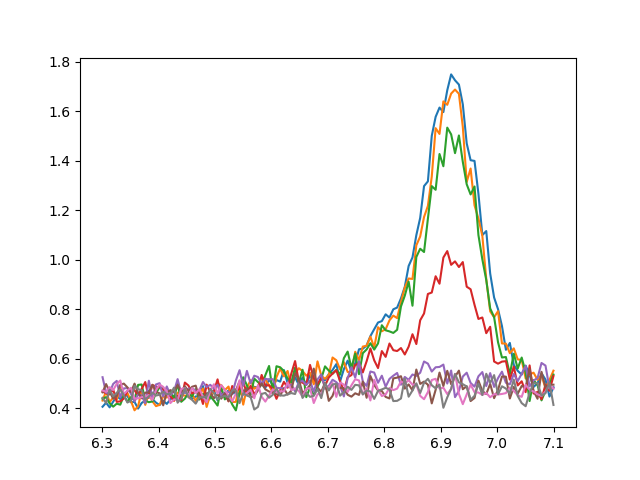

In [5]:
import warnings
warnings.filterwarnings('ignore')
% matplotlib notebook
import numpy as np
import pylab as plt

data1 = np.loadtxt('project2_data\data_02.0K.txt')
plt.plot(data1[:,0],data1[:,1])

data2 = np.loadtxt('project2_data\data_03.0K.txt')
plt.plot(data2[:,0],data2[:,1])

data3 = np.loadtxt('project2_data\data_04.0K.txt')
plt.plot(data3[:,0],data3[:,1])

data4 = np.loadtxt('project2_data\data_06.5K.txt')
plt.plot(data4[:,0],data4[:,1])

data5 = np.loadtxt('project2_data\data_07.5K.txt')
plt.plot(data5[:,0],data5[:,1])

data6 = np.loadtxt('project2_data\data_10.0K.txt')
plt.plot(data6[:,0],data6[:,1])

data7 = np.loadtxt('project2_data\data_15.0K.txt')
plt.plot(data7[:,0],data7[:,1])

data8 = np.loadtxt('project2_data\data_30.0K.txt')
plt.plot(data8[:,0],data8[:,1])

plt.show()

In [20]:
?a.all

## 2. Integrating the data

You will see that the steps in $d$-spacing are not even, due to the particular experimental setup we used. As a result, the `trapezoid` function we have previously coded is not appropriate. However, we can still use the trapezoid method.

If you are feeling brave, code this yourself. (*Hint*: since the spacing along the $d$-axis is not constant, you will need to consider all of the $d$ values rather than just a single value of the spacing as we did in class.)

If you are not feeling so brave, use the `trapz` function from `numpy` to do this for you.

Either way, **integrate the data and plot the integrated magnetic diffraction intensity as a function of temperature.**

[0.55370041821750005, 0.54398800016850002, 0.52176410136130014, 0.45744638736225018, 0.40413061866560007, 0.38292780808670013, 0.37575071092150003, 0.37118946598635005]


<IPython.core.display.Javascript object>


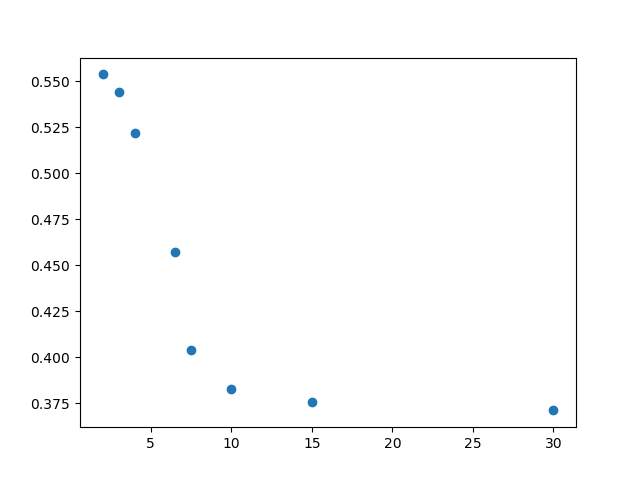

In [8]:
% matplotlib notebook
imdi = []
data = [data1, data2, data3, data4, data5, data6, data7, data8]
for i in range(8):
    x = np.trapz((data[i])[:,1], (data[i])[:,0])
    imdi.append(x)
print(imdi)
temps = [2.0, 3.0, 4.0, 6.5, 7.5, 10.0, 15.0, 30.0]
plt.plot(temps, imdi, 'o')
plt.show()


In [54]:
?np.trapz|

## 3. A model for the magnetic signal as a function of temperature

The usual functional form to which we fit these data is

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

You can see that this gives the magnetisation $M$ as a function of temperature $T$ with four parameters: the amplitude $A$ of the magnetic signal, the magnetic transition temperature $T_0$, the *critical exponent* $\beta$, and a constant background $B$.

**Code this function in Python.** (*Hint*: you will want this to work with `array`s `T`. So rather than saying

    if T < T0:
        ...
        
as you might if you were considering only a single value of `T`, use the `where` function from `numpy`. This has syntax

    where(condition, value_if_true, value_if_false)
    
so you might write

    where(T < T0, ..., ...)
    
which will work beautifully with `array`s.)

**Find suitable initial guesses for $A$, $T_0$, $\beta$, and $B$.** This is a fairly fiddly function to fit, and you will need these initial guesses to be pretty close for the fitting routine that follows to work!

<IPython.core.display.Javascript object>


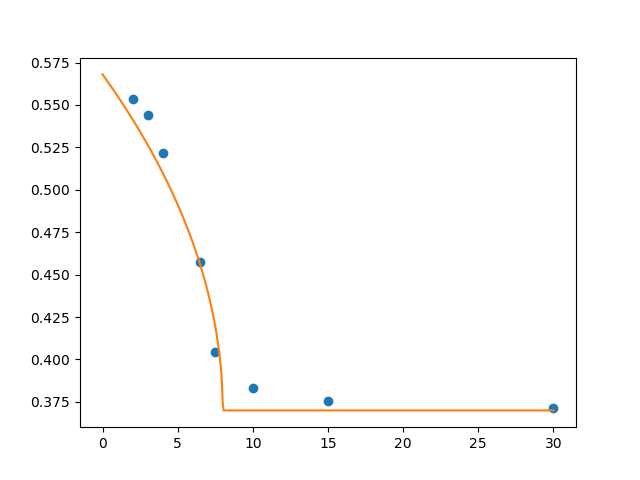

In [7]:
% matplotlib notebook

def M(T, A, T0, beta, B): return np.where(T < T0, (A*((T0-T)**beta))+ B, B)

t = np.linspace(0, 30, 500)
m = M(t, 0.07, 8, 0.5, 0.37)

plt.plot(temps, imdi, 'o')
plt.plot(t, m)
plt.show()
        

## 4. Fitting the data

**Fit the model to the data.** One way of doing this is to use the code that we developed in Lab 9. You will need to define a suitable function `g`; the remaining functions `CD`, `jacobian`, and `nD_Newton_step` should be able to be used essentially unchanged. Of course you may want to experiment with changing them!

An alternative method, once again, is to use the built-in fitting functions. If you want to explore these I recommend starting with `curve_fit`, from the `scipy.optimize` module.

**Plot your fit and check it looks sensible.** What is the magnetic transition temperature? What is the critical exponent $\beta$? What would you expect the intensity of the magnetic peak to be at 0 K?

<IPython.core.display.Javascript object>


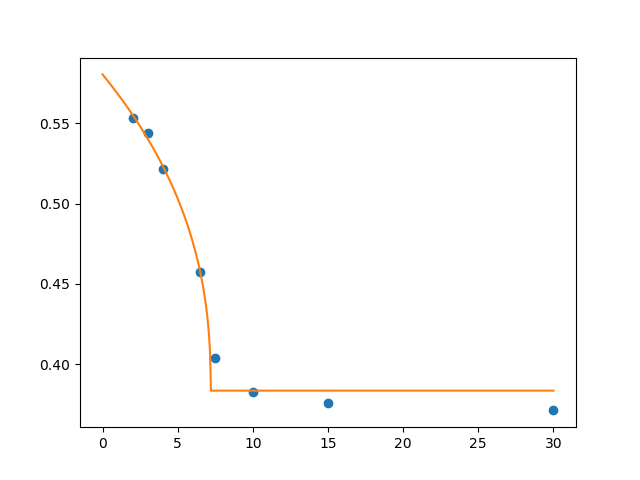

[ 0.08589907  7.19883998  0.42068291  0.38349813]


In [4]:
% matplotlib notebook
import scipy.optimize as scio

plt.plot(temps,imdi, 'o')

a = scio.curve_fit(M, temps, imdi, (0.07, 8, 0.5, 0.37))[0]
print(a)

plt.plot(t, M(t, a[0], a[1], a[2], a[3]))

plt.show()




In [27]:
?scio.curve_fit

## 5. Discussion and further exploration

Explore your model. Some questions you might want to consider: how sensitive is your fit to the initial guess? Can you come up with a different plausible fit? What happens if you change the integration range? How sensitive is the fit to noise in the data? What happens if you delete just one point: does the fit change much?

Of course feel free to come up with your own questions about the model you have built!

## Writing this up as a report (due Sunday 11 November)

Refer to the instructions on QM+. For this report I would like to see all sections: Introduction, Methods, Results, Discussion, and Conclusions. Think carefully about your results and explain them in a way that doesn't assume your reader is an expert in the science or the code.

As a start for your references, in addition to the paper on this material referenced above, you might like to refer to two very early reports of antiferromagnetic neutron diffraction in manganese oxide, MnO [[2](https://journals.aps.org/pr/pdf/10.1103/PhysRev.76.1256.2), [3](https://journals.aps.org/pr/pdf/10.1103/PhysRev.83.333)] These are complicated papers and difficult to read, so I recommend primarily looking at the figures. In the second, fuller paper, figures 4 and 6 show the magnetic diffraction peaks disappearing as the temperature is raised while figure 7 shows the intensity as a function of temperature. This should look similar to your own results!

I don't expect a lot of references, but it would be good to give a hint of the scientific context, and you may also want to refer, say, to the documentation for the Python functions you use.